# <center> Stromnetz Graz Smart Meter Analysis

In [1]:
# Imports for plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.gridspec as gridspec
# Custom Modules
from SMIT.application import Application

## Setup

### Run with dummy data

In [ ]:
app = Application(True)                 # Run appliction in dummy mode.
app.os_tools.sng_scrape_and_move()      # No webscraping, dummy csv file setup.

# Create dataframes with all data
df_day = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['day_meter'])
df_night = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['night_meter'])

# Print last entries of power consumption during the days
df_day.tail()

### Run with live data
An account to Stromnetz Graz is needed  
Input dialog will be triggered

In [3]:
app = Application()                     # Create user from user_data file
app.os_tools.sng_scrape_and_move()      # Get/Update data from stromnetzgraz website

# Create dataframes with all data
df_day = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['day_meter'])
df_night = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['night_meter'])

# Print last entries of power consumption during the days
df_day.tail()

2023-10-17 14:14:36,943 :: INFO     :: [application:82] :: Application with user "ch.koplenig@posteo.net" instantiated
2023-10-17 14:14:36,945 :: INFO     :: [scrapedata:113] :: Firefox headless mode activated
2023-10-17 14:15:00,654 :: INFO     :: [scrapedata:300] :: Downloaded data with the following arguments:
2023-10-17 14:15:00,655 :: INFO     :: [scrapedata:301] :: Start date: 01-01-2023
2023-10-17 14:15:00,656 :: INFO     :: [scrapedata:302] :: End date: 16-10-2023


,date,zaehlerstand,verbrauch
284,2023-10-12,3373.804,3117.0
285,2023-10-13,3380.449,6645.0
286,2023-10-14,3384.968,4519.0
287,2023-10-15,3389.734,4766.0
288,2023-10-16,3391.331,1597.0


## Analysis
Shown data depends on previous run with either dummy data or live data

/data/coding/SMIT/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/coding/SMIT/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/coding/SMIT/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/coding/SMIT/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

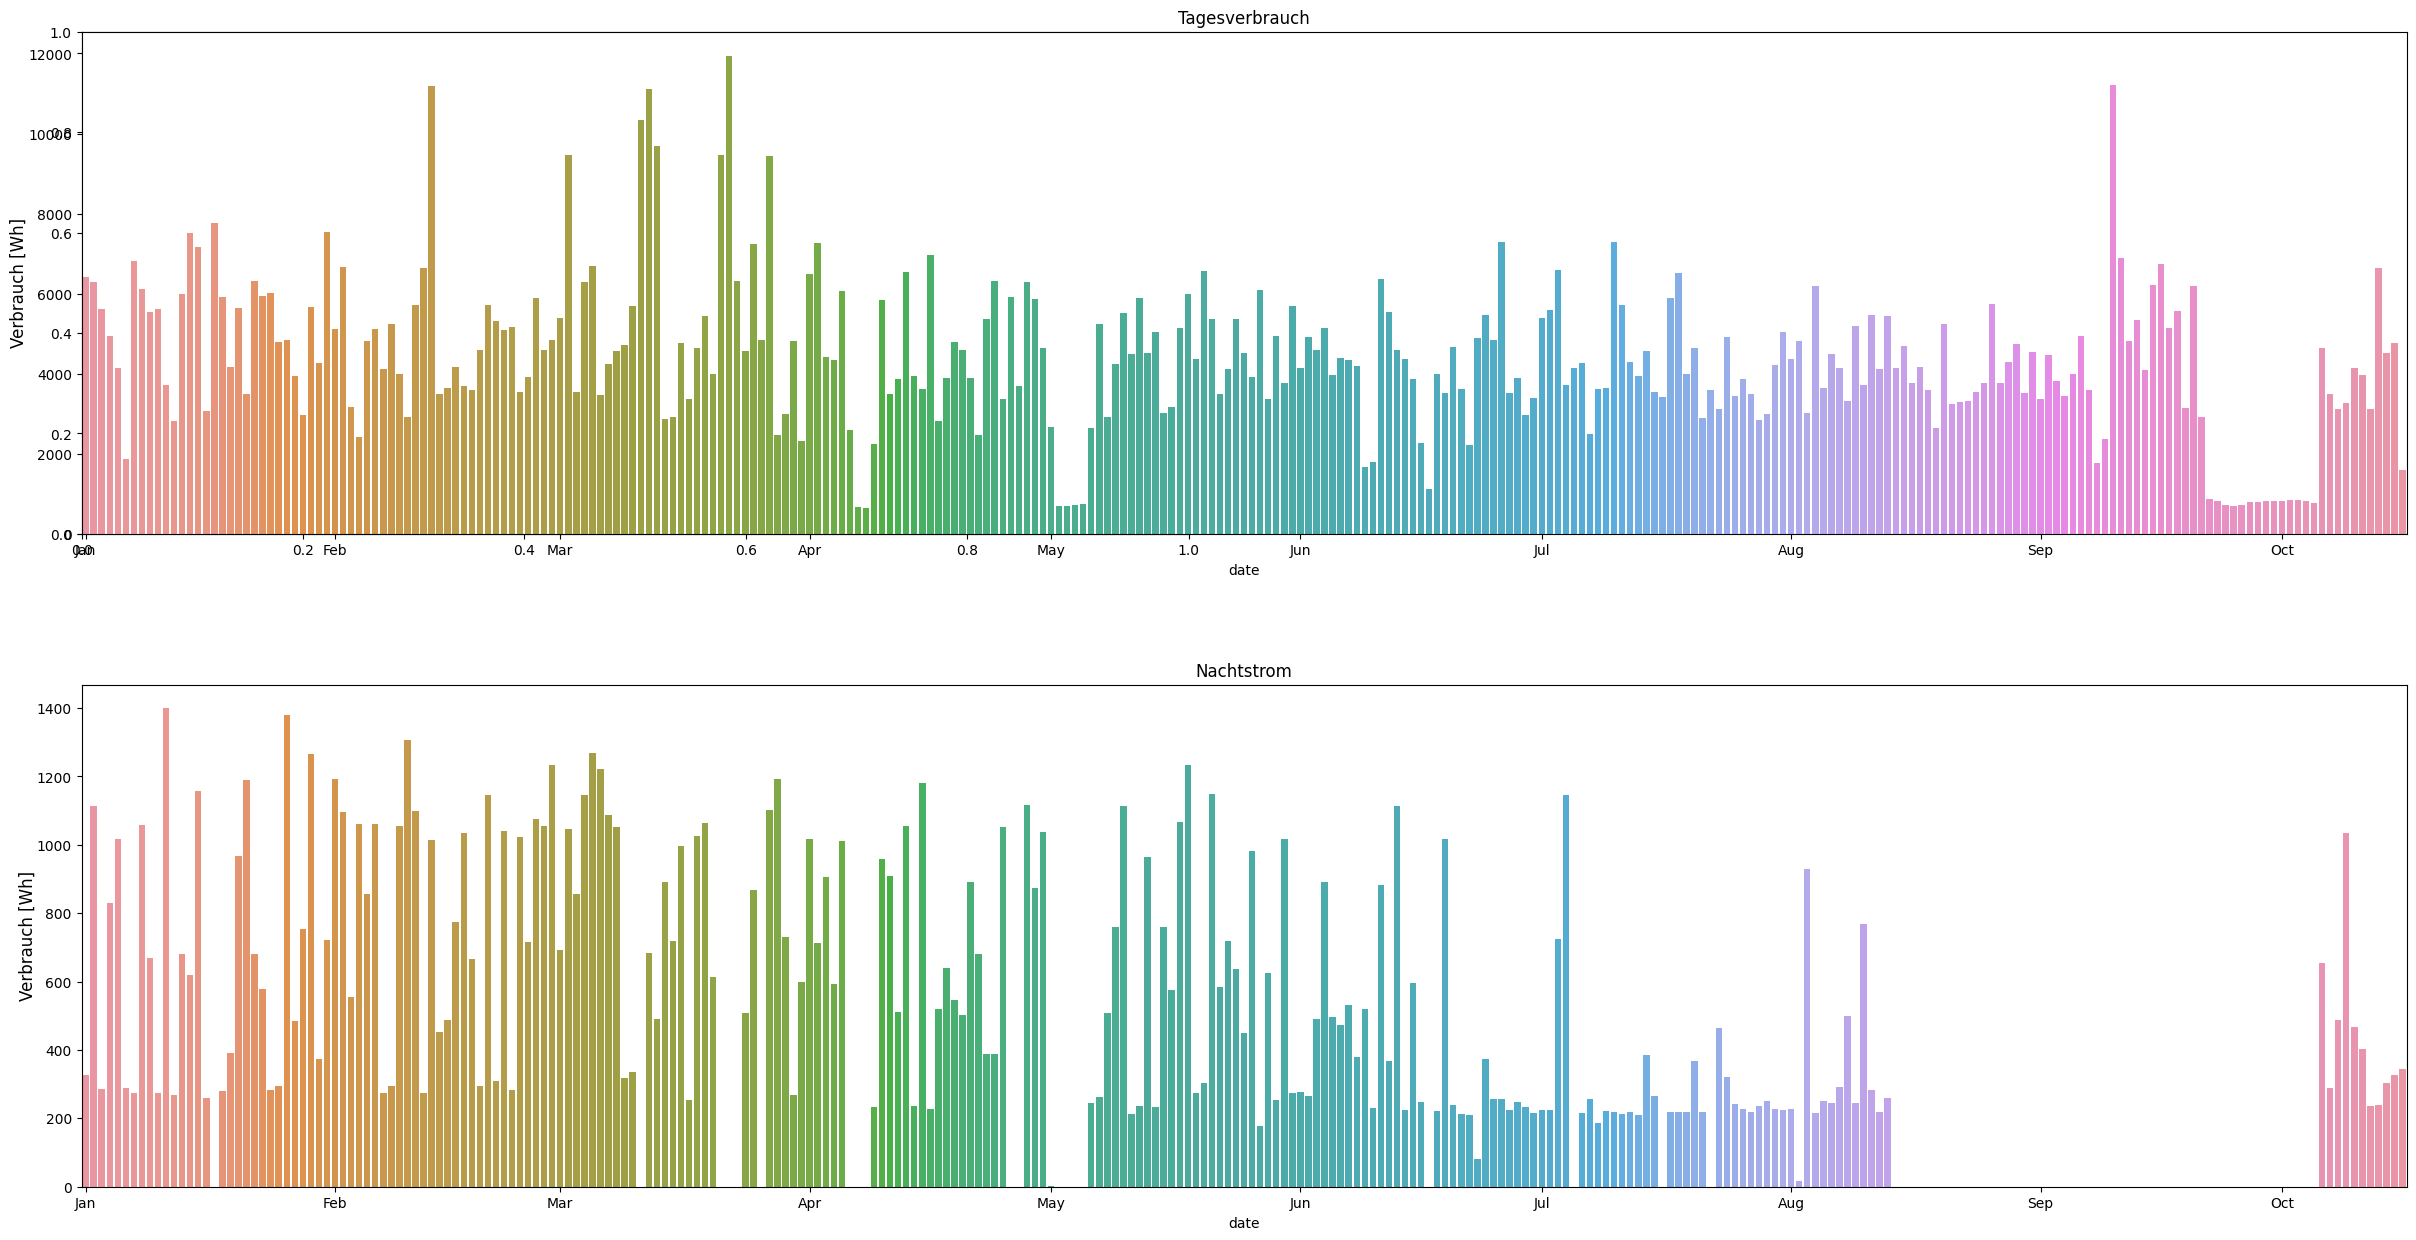

In [4]:
fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
gs.update(wspace = 0.1, hspace = 0.3)

### AX1 ###
ax1 = plt.subplot(gs[0, :2])
sns.barplot(data=df_day,
            x='date',
            y='verbrauch')
ax1.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax1.set_title('Tagesverbrauch')

### AX2 ###
ax2 = plt.subplot(gs[1, :2])
sns.barplot(data=df_night,
            x='date',
            y='verbrauch')
ax2.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax2.set_title('Nachtstrom')

### Draw Plot ###
plt.show()